In [1]:
!pip install selenium beautifulsoup4 pandas seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 30.2 MB/s eta 0:00:00


In [ ]:
#Exercise 1
# Need to see  code file 'index.html'
%%writefile index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>JavaScript Data Types</title>
</head>
<body>
    <h1>Open the browser console to see the output</h1>

    <script>
        // Declaring variables with different data types
        let myString = "Hello, JavaScript!"; // String
        let myNumber = 42;                  // Number
        let myBoolean = true;               // Boolean
        let myUndefined;                    // Undefined
        let myNull = null;                  // Null
        let myObject = { name: "Alice", age: 30 }; // Object
        let myArray = [1, 2, 3, 4];         // Array (Object type)

        // Displaying variables and their types in the console
        console.log("myString:", myString, "-", typeof myString);
        console.log("myNumber:", myNumber, "-", typeof myNumber);
        console.log("myBoolean:", myBoolean, "-", typeof myBoolean);
        console.log("myUndefined:", myUndefined, "-", typeof myUndefined);
        console.log("myNull:", myNull, "-", typeof myNull); // Warning: typeof null returns "object" (historical bug in JS)
        console.log("myObject:", myObject, "-", typeof myObject);
        console.log("myArray:", myArray, "-", typeof myArray); // typeof returns "object", but Array.isArray(myArray) allows you to check if it is an array
    </script>
</body>
</html>

Writing index.html


In [ ]:
# Exercise 2

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Static HTML Page</title>
</head>
<body>
    <h1>Welcome to my static page</h1>
    <p>This is a simple HTML page without interactivity.</p>

    <ul>
        <li>Element 1</li>
        <li>Element 2</li>
        <li>Element 3</li>
    </ul>
</body>
</html>





<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dynamic HTML Page</title>
</head>
<body>
    <h1 id="main-title">Welcome to my dynamic page</h1>
    <p>This is an HTML page with JavaScript.</p>
    <ul>
        <li>Element 1</li>
        <li>Element 2</li>
        <li>Element 3</li>
    </ul>

    <script>
        // Dynamically change title text after page load
        document.addEventListener("DOMContentLoaded", function() {
            document.getElementById("main-title").textContent = "Title modified by JavaScript 🎉";
        });
    </script>
</body>
</html>

# Need to see 'index2.html' and 'index3.html' code

In [2]:
# Exercise 3
!pip install selenium beautifulsoup4 webdriver-manager
!pip install chromedriver-autoinstaller

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pprint  # To tidy up

options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options=options)

url = "https://www.rottentomatoes.com/browse/movies_at_home/affiliates:netflix~critics:certified_fresh"
driver.get(url)

soup = BeautifulSoup(driver.page_source, 'html.parser')
movies = soup.find_all(attrs={"data-qa": "discovery-media-list-item"})

for movie in movies:
    title = [item.get_text() for item in soup.find_all(class_ = 'p--small')]
    score = [item.get_text() for item in soup.find_all(class_ = 'criticsscore')]
    release_date = [item.get_text() for item in soup.find_all(class_ = 'smaller')]

    print(f"Title: {title}")
    print(f"Score: {score}")
    print(f"Release Date: {release_date}")
    print("-------------")

Title: ['Black Bag', 'The Assessment', 'Magazine Dreams', 'The Residence: Season 1', '\n          Emilia Pérez\n        ', '\n          Interstellar\n        ', '\n          Sicario\n        ', '\n          Hit Man\n        ', '\n          Rebel Ridge\n        ', '\n          The Menu\n        ', '\n          Carry-On\n        ', '\n          The Outrun\n        ', '\n          You Hurt My Feelings\n        ', '\n          Dungeons & Dragons: Honor Among Thieves\n        ', '\n          Leave the World Behind\n        ', "\n          It's What's Inside\n        ", '\n          Woman of the Hour\n        ', '\n          Dune: Part Two\n        ', '\n          Furiosa: A Mad Max Saga\n        ', '\n          Aftersun\n        ', '\n          Hereditary\n        ', '\n          Wallace & Gromit: Vengeance Most Fowl\n        ', '\n          The Stranger\n        ', '\n          The Killer\n        ', '\n          The Gentlemen\n        ', '\n          Maria\n        ', '\n          The Iri

In [2]:
# Exercise 4
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# ** Selenium Configuration **
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

#  Selenium launching
driver = webdriver.Chrome(options=options)

# Go to the BBC Technology page
url = "https://www.bbc.com/innovation/technology"
driver.get(url)
time.sleep(5)

# Extract HTML code
soup = BeautifulSoup(driver.page_source, "html.parser")

# Closing Selenium
driver.quit()

# ** Titles extraction **
titles = [title.text.strip() for title in soup.find_all("h2", {"data-testid": "card-headline"})]

# ** Dates extraction **
dates_raw = [date.text.strip() for date in soup.find_all("span",class_= "sc-6fba5bd4-1 ioNoDA")]
for span in soup.find_all("span"):
    print(span.get("data-testid"), ":", span.text)
for span in soup.find_all("span"):
    print(span.prettify())


# ** Transforming dates into readable format **
def convert_relative_date(date_text):
    if "days ago" in date_text:
        days = int(date_text.split()[0])
        return (datetime.today() - timedelta(days=days)).strftime('%B %Y')
    return "Unknown"

dates = [convert_relative_date(date) for date in dates_raw]

# ** Check the lengths **
print(f"Titles Number : {len(titles)}")
print(f"Dates Number  : {len(dates)}")

# ** Adjust the size of lists **
min_length = min(len(titles), len(dates))
titles = titles[:min_length]
dates = dates[:min_length]

# **  DataFrame creation **
df = pd.DataFrame({"Title": titles, "Month": dates})

# **  Displaying of first results **
print(df.head())

None : Advertisement
watch-now-live-icon : 
None : Watch
button-text : Register
button-text : Sign In
button-icon-wrapper : 
level0NavText-/home : Home
level0NavText-/news : News
level0NavText-/sport : Sport
level0NavText-/business : Business
level0NavText-/innovation : Innovation
level0NavText-/culture : Culture
level0NavText-/arts : Arts
level0NavText-/travel : Travel
level0NavText-/future-planet : Earth
level0NavText-/audio : Audio
level0NavText-/video : Video
level0NavText-/live : Live
level0NavText-https://www.bbc.com/weather : Weather
level0NavText-https://www.bbc.com/newsletters : Newsletters
None : Advertisement
None : See more
card-metadata-lastupdated : 2 hrs ago
card-metadata-tag : Wales
card-metadata-lastupdated : 4 hrs ago
card-metadata-tag : Innovation
card-metadata-lastupdated : 6 hrs ago
card-metadata-tag : US & Canada
card-metadata-lastupdated : 8 hrs ago
card-metadata-tag : Technology
card-metadata-lastupdated : 11 hrs ago
card-metadata-tag : Business
card-metadata-la

<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="light dark" name="color-scheme"/>
  <meta content="#fff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <title>
   www.accuweather.com
  </title>
  <style>
   /* Copyright 2017 The Chromium Authors
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: var(--link-color);
}

body {
  --background-color: #fff;
  --error-code-color: var(--google-gray-700);
  --google-blue-50: rgb(232, 240, 254);
  --google-blue-100: rgb(210, 227, 252);
  --google-blue-300: rgb(138, 180, 248);
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-100: rgb(241, 243, 244);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray
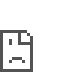
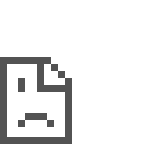
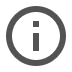
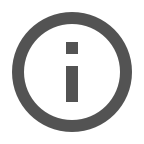
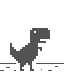
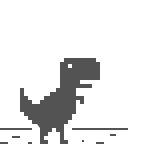
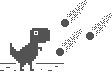
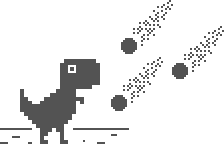
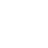
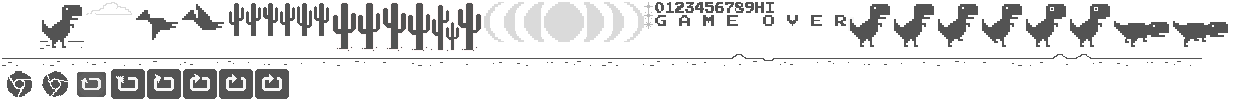
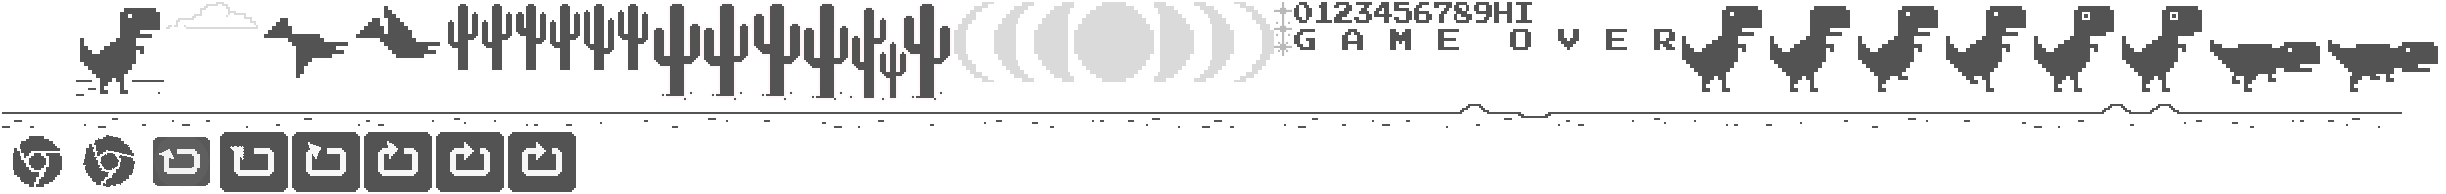

In [41]:
print(soup.prettify())


In [4]:

# Exercise 5
import time
import statistics
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# **  Selenium Configuration **
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Exécuter sans interface graphique
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.178 Safari/537.36")

# ** Selenium Launching **
driver = webdriver.Chrome(options=options)
url = "https://www.accuweather.com/en/us/attica/30607/weather-forecast/2139413"
driver.get(url)

# ** Wait for weather data to load**
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "daily-list-item"))
    )
except:
    print(" The weather page did not load correctly. Check the URL or bot blocking.")
    driver.quit()
    exit()

# ** Extracting HTML after loading **
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()

# ** Extraction of meteorological data **
temperatures = []
conditions = []
humidities = []

for forecast in soup.find_all('a', class_='daily-list-item'):
    # ** Extraction of temperatures **
    temp_tag = forecast.find('span', class_='temp-hi')
    if temp_tag and temp_tag.text.strip():
        try:
            temp_hi = int(temp_tag.text.strip().replace("°", ""))
            temperatures.append(temp_hi)
        except ValueError:
            pass  # Ignore non-convertible values

    # ** Extracting weather conditions **
    cond_tag = forecast.find('div', class_='phrase')
    if cond_tag and cond_tag.find("p", class_="no-wrap"):
        conditions.append(cond_tag.find("p", class_="no-wrap").text.strip())

    # ** Humidity extraction **
    humidity_tag = forecast.find('div', class_='precip')
    if humidity_tag and humidity_tag.text.strip():
        match = re.search(r"(\d+)%", humidity_tag.text)
        if match:
            humidities.append(int(match.group(1)))

# ** Verification of extracted data **
print(f" {len(temperatures)} temperatures found.")
print(f" {len(conditions)} weather conditions found.")
print(f" {len(humidities)} humidity values ​​found.")

# ** Data Analysis **
Mean_temp = round(statistics.mean(temperatures), 1) if temperatures else "No Available"
most_common_condition = Counter(conditions).most_common(1)[0][0] if conditions else "Unknown"
Mean_humidity = round(statistics.mean(humidities), 1) if humidities else "No Available"

# ** Results Display **
print("\n **Weather analysis **")
print("*" * 40)
print(f" Mean Temperature : {Mean_temp}°F")
print(f" Most common weather condition : {most_common_condition}")
print(f" Mean Humidity : {Mean_humidity}%")


 10 temperatures found.
 10 weather conditions found.
 10 humidity values ​​found.

 **Weather analysis **
****************************************
 Mean Temperature : 71.9°F
 Most common weather condition : Sunny to partly cloudy
 Mean Humidity : 16.7%
